### 왜 표본을 사용할까
* 전체 인구(모집단)을 조사하는 것은 비용과 시간이 너무 큼
* 잘 뽑은 표본으로도 모집단의 특성을 충분히 파악할 수 있음

#### 주요 용어
* 모집단: 관심 있는 전체 집단
* 표본: 모집단에서 실제로 조사한 일부
* 모수: 모집단의 특성값 (μ, σ²)
* 통계량: 표본의 특성값 (x̄, s²)

### 점추정
표본 통계량으로 모수를 하나의 값으로 추정
* 표본평균(x̄)으로 모평균(μ) 추정
* 표본분산(s²)으로 모분산(σ²) 추정

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mac 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 1. 모집단 생성 (전체 학생 10,000명의 시험 점수)
np.random.seed(42)
population = np.random.normal(loc=75, scale=10, size=10000)

print("=== 모집단 정보 ===")
print(f"모평균(μ): {population.mean():.2f}")
print(f"모표준편차(σ): {population.std():.2f}")

=== 모집단 정보 ===
모평균(μ): 74.98
모표준편차(σ): 10.03


In [4]:
# 2. 표본 추출 (100명만 조사)
sample = np.random.choice(population, size=100, replace=False)

print("\n=== 표본 정보 ===")
print(f"표본평균(x̄): {sample.mean():.2f}")
print(f"표본표준편차(s): {sample.std(ddof=1):.2f}")


=== 표본 정보 ===
표본평균(x̄): 76.17
표본표준편차(s): 10.71


In [5]:
# 3. 점추정 비교
print("\n=== 점추정 결과 ===")
print(f"모평균 추정: {sample.mean():.2f} (실제: {population.mean():.2f})")
print(f"오차: {abs(sample.mean() - population.mean()):.2f}")


=== 점추정 결과 ===
모평균 추정: 76.17 (실제: 74.98)
오차: 1.19


In [10]:
# 4. 여러 표본으로 실험 (중심극한정리 확인)
sample_means = []

# 만 명에서 100명을 뽑아 평균을 기록하는 것을 1000번 반복
for i in range(1000):
    s = np.random.choice(population, size=100, replace=False)
    sample_means.append(s.mean())

In [23]:
def draw(size):
    # 5. 시각화
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # 모집단 분포
    axes[0].hist(population, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0].axvline(population.mean(), color='red', linestyle='--', linewidth=2, label=f'모평균: {population.mean():.2f}')
    axes[0].set_title('모집단 분포', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('점수')
    axes[0].set_ylabel('빈도')
    axes[0].legend()
    
    # 표본평균들의 분포
    axes[1].hist(sample_means, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1].axvline(population.mean(), color='red', linestyle='--', linewidth=2, label=f'모평균: {population.mean():.2f}')
    axes[1].axvline(np.mean(sample_means), color='blue', linestyle='--', linewidth=2, label=f'표본평균들의 평균: {np.mean(sample_means):.2f}')
    axes[1].set_title('표본평균들의 분포 (n=1000)' + '표본크기:' + str(size), fontsize=14, fontweight='bold')
    axes[1].set_xlabel('표본평균')
    axes[1].set_ylabel('빈도')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

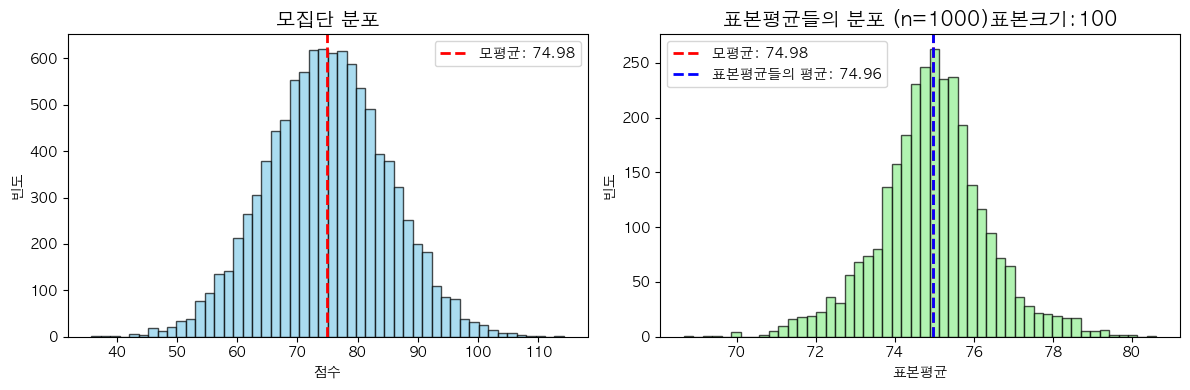

In [24]:
draw(100)

In [25]:
# 6. 실습 문제
print("\n" + "="*50)
print("✏️ 실습 문제")
print("="*50)
print("1. 표본 크기를 30, 50, 200으로 바꿔가며 추정 정확도를 비교해보세요.")
print("2. 모집단 평균을 80, 표준편차를 15로 바꿔서 실험해보세요.")
print("3. 표본을 여러 번 뽑아 매번 다른 결과가 나오는지 확인해보세요.")


✏️ 실습 문제
1. 표본 크기를 30, 50, 200으로 바꿔가며 추정 정확도를 비교해보세요.
2. 모집단 평균을 80, 표준편차를 15로 바꿔서 실험해보세요.
3. 표본을 여러 번 뽑아 매번 다른 결과가 나오는지 확인해보세요.


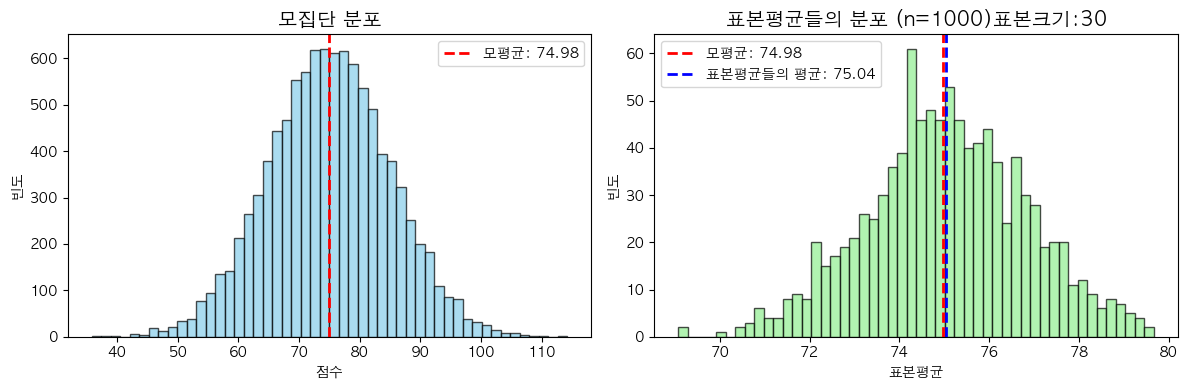

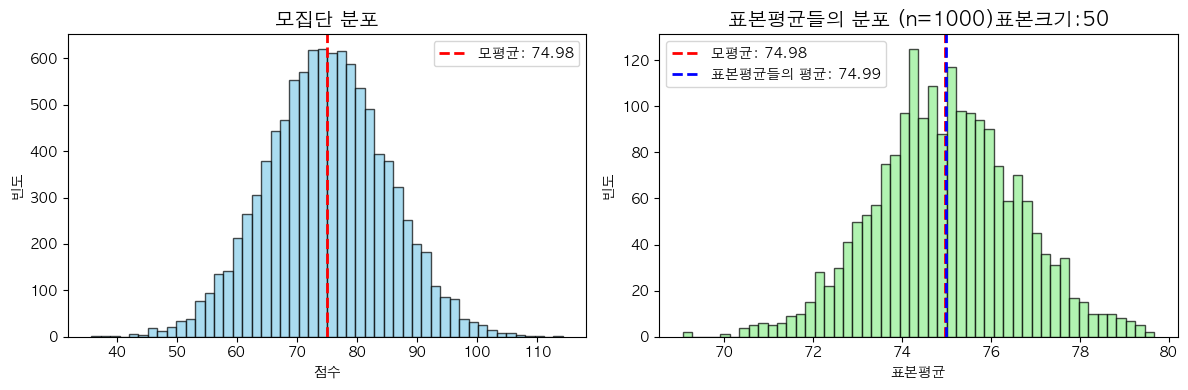

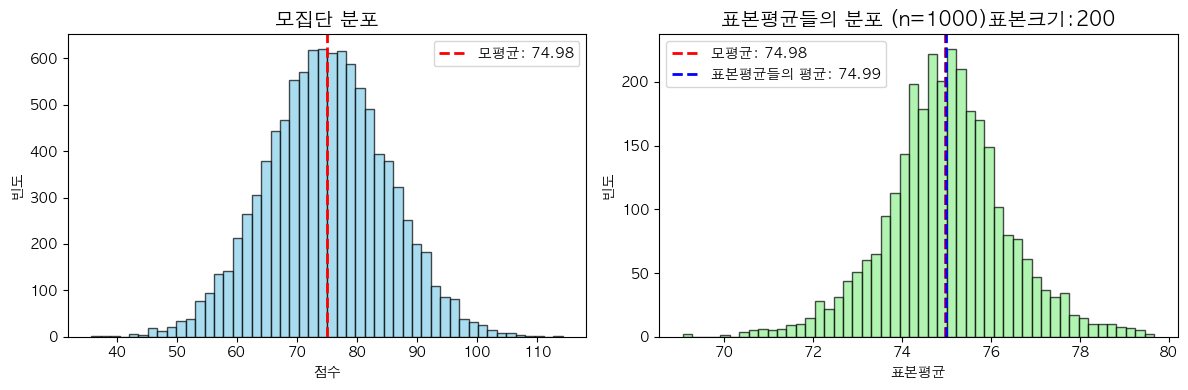

In [26]:
# 1. 표본 크기를 30, 50, 200으로 바꿔가며 추정 정확도를 비교해보세요
sample_sizes = [30, 50, 200]
sample_means = []

# 만 명에서 100명을 뽑아 평균을 기록하는 것을 1000번 반복
for size in sample_sizes:
    for i in range(1000):
        s = np.random.choice(population, size=size, replace=False)
        sample_means.append(s.mean())
    draw(size)

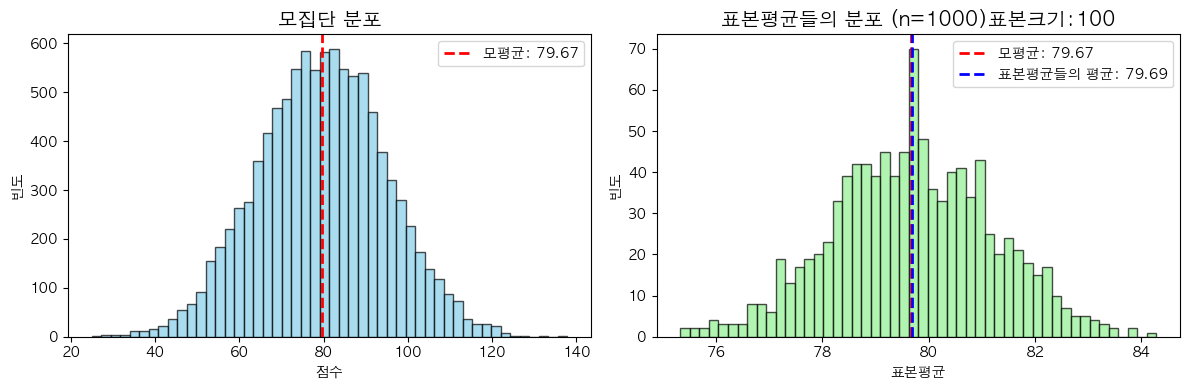

In [27]:
# 2. 모집단 평균을 80, 표준편차를 15로 바꿔서 실험해보세요."

population = np.random.normal(loc=80, scale=15, size=10000)

sample_means = []
for i in range(1000):
    s = np.random.choice(population, size=100, replace=False)
    sample_means.append(s.mean())

draw(100)